<a href="https://colab.research.google.com/github/karanidnani350/softwareengmgmt/blob/main/SEM_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cellxgene_census

In [ ]:
pip install scanpy

In [ ]:
import urllib
import scanpy as sc

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = sc.read_h5ad('dataset.h5ad')

genes_of_interest = [
    "SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1",
    "PDE4DIP", "RP11-289H16.1", "AC159540.1", "RP11-219A15.1",
    "LINC01609", "PHYHIP", "RP11-745L13.2"
]


available_genes = adata.var['feature_name'].isin(genes_of_interest)
loaded_genes = adata.var['feature_name'][available_genes].tolist()

# Filter the dataset to include only the specified genes

filtered_adata = adata[:, available_genes].copy()



# Print the successfully loaded genes
print("Successfully loaded genes:", loaded_genes)
print(f"Total genes loaded: {len(loaded_genes)}")

# Print genes that were not found, if any
missing_genes = set(genes_of_interest) - set(loaded_genes)
if missing_genes:
    print("Genes not found in dataset:", missing_genes)

# I didn't know the data point that contains all the genes so I used below code was used to find the data point name for a sample gene.
# for column in adata.var.columns:
#     if 'SLC26A3' in adata.var[column].values:
#         print(f"SLC26A3 found in var column: {column}")



# Visualizing in tabular format for my own understanding
display(filtered_adata.var.head())
display(filtered_adata.obs.head())

Successfully loaded genes: ['SLC26A3', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP', 'RASGEF1B']
Total genes loaded: 6
Genes not found in dataset: {'RP11-701H24.9', 'RP11-219A15.1', 'RP11-289H16.1', 'AC159540.1', 'RP11-745L13.2'}


,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000091138,False,SLC26A3,NCBITaxon:9606,gene,646,protein_coding
ENSG00000169783,False,LINGO1,NCBITaxon:9606,gene,579,protein_coding
ENSG00000178104,False,PDE4DIP,NCBITaxon:9606,gene,927,protein_coding
ENSG00000253103,False,LINC01609,NCBITaxon:9606,gene,536,lncRNA
ENSG00000168490,False,PHYHIP,NCBITaxon:9606,gene,847,protein_coding


,nCount_RNA,nFeature_RNA,percent.mt,SORT,Amyloid,Age,RIN,nCount_SCT,nFeature_SCT,nCount_Exon,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
C0001_AAACGGGCAGTACACT-1,927.0,694,1.833873,MAP2,C3,73,5.7,2092.0,787,344.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,5$tsN89o-C
C0001_AAACGGGGTACCGTAT-1,1251.0,886,6.474820,MAP2,C3,73,5.7,2440.0,915,598.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,i+HeMEM)4<
C0001_AAACGGGTCCAGAGGA-1,2972.0,1695,0.201884,MAP2,C3,73,5.7,2949.0,1695,968.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,oi@)SZWo%-
C0001_AAACGGGTCCTTCAAT-1,3619.0,1875,2.459243,MAP2,C3,73,5.7,3269.0,1873,1442.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,V#;BPg@9;|
C0001_AAAGATGGTCAACATC-1,3931.0,2247,2.467566,MAP2,C3,73,5.7,3441.0,2246,1753.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,dk0gL6!4f@


Alzheimer disease cohort statistics:
        ENSG00000091138  ENSG00000169783  ENSG00000178104  ENSG00000253103  \
count     11733.000000     11733.000000     11733.000000     11733.000000   
mean          1.210716         1.899750         1.301823         0.021722   
std           1.032462         1.058674         0.999631         0.179187   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         1.417540         0.000000         0.000000   
50%           1.401869         2.140287         1.592067         0.000000   
75%           2.045627         2.642966         2.106438         0.000000   
max           4.127942         4.539868         3.888691         2.756793   

       ENSG00000168490  ENSG00000138670  
count     11733.000000     11733.000000  
mean          0.498769         2.036067  
std           0.790712         1.037743  
min           0.000000         0.000000  
25%           0.000000         1.624977  
50%           0.

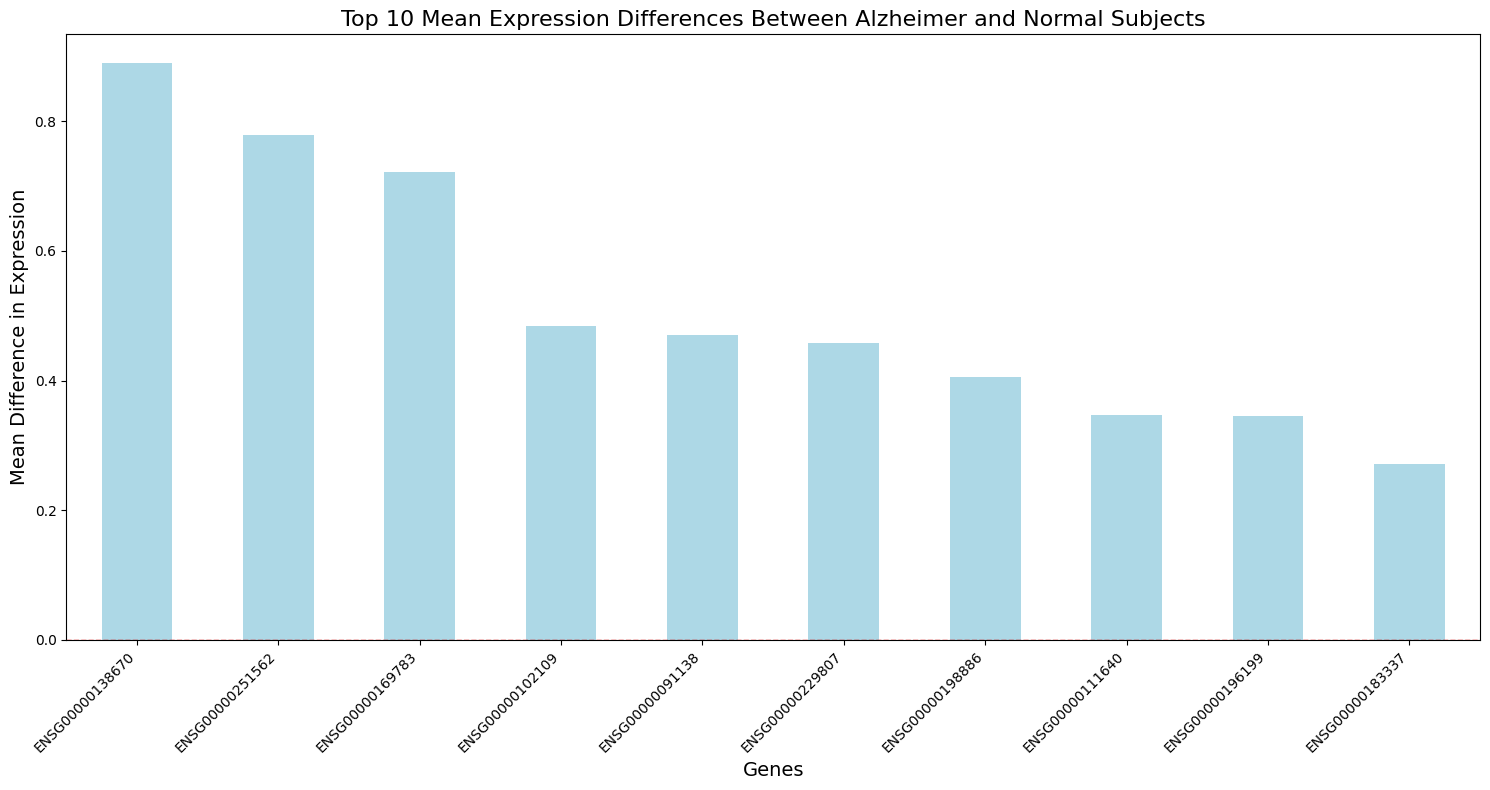

In [ ]:
import matplotlib.pyplot as plt
# Categorizing Alzheimer v/s Normal

alzheimer_data = filtered_adata[filtered_adata.obs['disease'] == 'Alzheimer disease']
normal_data = filtered_adata[filtered_adata.obs['disease'] == 'normal disease']


# Checking the statistics
alzheimer_stats = alzheimer_data.to_df().describe()
normal_stats = normal_data.to_df().describe()


print("Alzheimer disease cohort statistics:\n", alzheimer_stats)
print("\nNormal disease cohort statistics:\n", normal_stats)

expr_df = adata.to_df()

# Add disease labels to the DataFrame
expr_df['disease'] = adata.obs['disease'].values

numerical_cols = expr_df.select_dtypes(include='number').columns

# Calculate mean expression per gene for each disease category
alzheimer_means = expr_df[expr_df['disease'] == 'Alzheimer disease'][numerical_cols].mean()
normal_means = expr_df[expr_df['disease'] == 'normal'][numerical_cols].mean()

# Calculate the difference in means
mean_diff = alzheimer_means - normal_means
print("Mean differences:\n", mean_diff)

# Show the top 10 genes with the largest differences in expression
top_n = 10
mean_diff_sorted = mean_diff.sort_values(ascending=False)
mean_diff_sorted = mean_diff_sorted.head(top_n)

print("Top 10 genes with the largest mean expression differences:\n", mean_diff_sorted)

# Plotting the mean differences
plt.figure(figsize=(15, 8))  # Increase the figure size
mean_diff_sorted.plot(kind='bar', color='lightblue')

# Enhance readability
plt.title('Top 10 Mean Expression Differences Between Alzheimer and Normal Subjects', fontsize=16)
plt.ylabel('Mean Difference in Expression', fontsize=14)
plt.xlabel('Genes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and align them
plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Line at zero for reference
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show()




<ipython-input-9-e9e70485d82a>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_by_age = expr_df_age.groupby('age_range')[top_genes].mean()


<Figure size 1500x800 with 0 Axes>

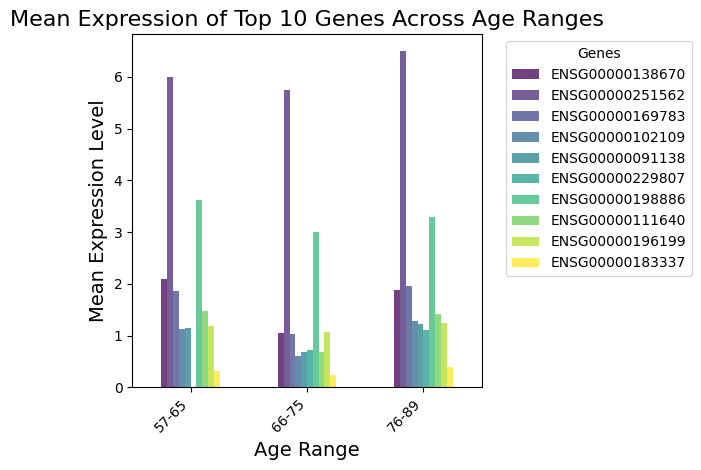

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

top_genes = mean_diff_sorted.index

# Filter data within the age range (57 - 89) for only the top 10 genes
age_filtered_data = adata[adata.obs['Age'].between(57, 89)]
expr_df_age = age_filtered_data[:, top_genes].to_df()

# Add age and development stage information
expr_df_age['Age'] = age_filtered_data.obs['Age'].astype(int)  # Ensure Age is numerical
expr_df_age['development_stage'] = age_filtered_data.obs['development_stage'].str.extract(r'(\d+)', expand=False).astype(int)

# Group ages into age ranges (e.g., 57-65, 66-75, 76-89)
age_bins = [57, 65, 75, 89]
age_labels = ['57-65', '66-75', '76-89']
expr_df_age['age_range'] = pd.cut(expr_df_age['Age'], bins=age_bins, labels=age_labels, right=True)

# Calculate mean expression per gene for each age range
mean_expression_by_age = expr_df_age.groupby('age_range')[top_genes].mean()

# Plot the results for each gene across age ranges
plt.figure(figsize=(15, 8))
mean_expression_by_age.plot(kind='bar', colormap='viridis', alpha=0.75)

# Enhance plot readability
plt.title('Mean Expression of Top 10 Genes Across Age Ranges', fontsize=16)
plt.ylabel('Mean Expression Level', fontsize=14)
plt.xlabel('Age Range', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Genes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for labels

# Show the plot
plt.show()

Outliers for ENSG00000138670: []
Outliers for ENSG00000251562: ['C0007_AAACCTGTCATTTGGG-1', 'C0007_ATTATCCTCGGAATCT-1', 'C0007_GTATTCTGTTCAGGCC-1', 'C0009_TACGGATAGTCATCCA-1', 'C0002_TGACAACAGCCAGAAC-1', 'C0004_ACCCACTTCAGAGCTT-1', 'C0010_GTCAAGTGTCGGCATC-1', 'C0021_AATCCAGAGCTTATCG-1', 'C0021_ACATGGTAGGATGCGT-1', 'C0021_ACGCAGCCAGTGAGTG-1', 'C0021_ACGGGCTCATAAAGGT-1', 'C0021_AGCGTCGGTGTTGAGG-1', 'C0021_AGGGTGAAGGATGGTC-1', 'C0021_AGTGGGACAATACGCT-1', 'C0021_AGTGGGAGTCGCATCG-1', 'C0021_AGTGTCAGTACAAGTA-1', 'C0021_ATCATGGGTTTGGGCC-1', 'C0021_CATCAGACAAGGGTCA-1', 'C0021_CCCATACAGCATGGCA-1', 'C0021_CCGTTCATCACGACTA-1', 'C0021_CGAATGTCATCGTCGG-1', 'C0021_CGATGTAAGATAGGAG-1', 'C0021_CGATGTAGTTCCCGAG-1', 'C0021_CGGACACAGACCGGAT-1', 'C0021_CGGCTAGCAGTCGTGC-1', 'C0021_CGTCAGGAGCAAATCA-1', 'C0021_CGTCTACTCGTCTGCT-1', 'C0021_CGTGTAACAGCTCGAC-1', 'C0021_CTAACTTAGTAGGCCA-1', 'C0021_CTAGTGAAGGATGGAA-1', 'C0021_CTCACACAGAGCTGGT-1', 'C0021_CTCGAGGGTCCGTGAC-1', 'C0021_GATCGATTCGGATGGA-1', 'C0021_GGAAC

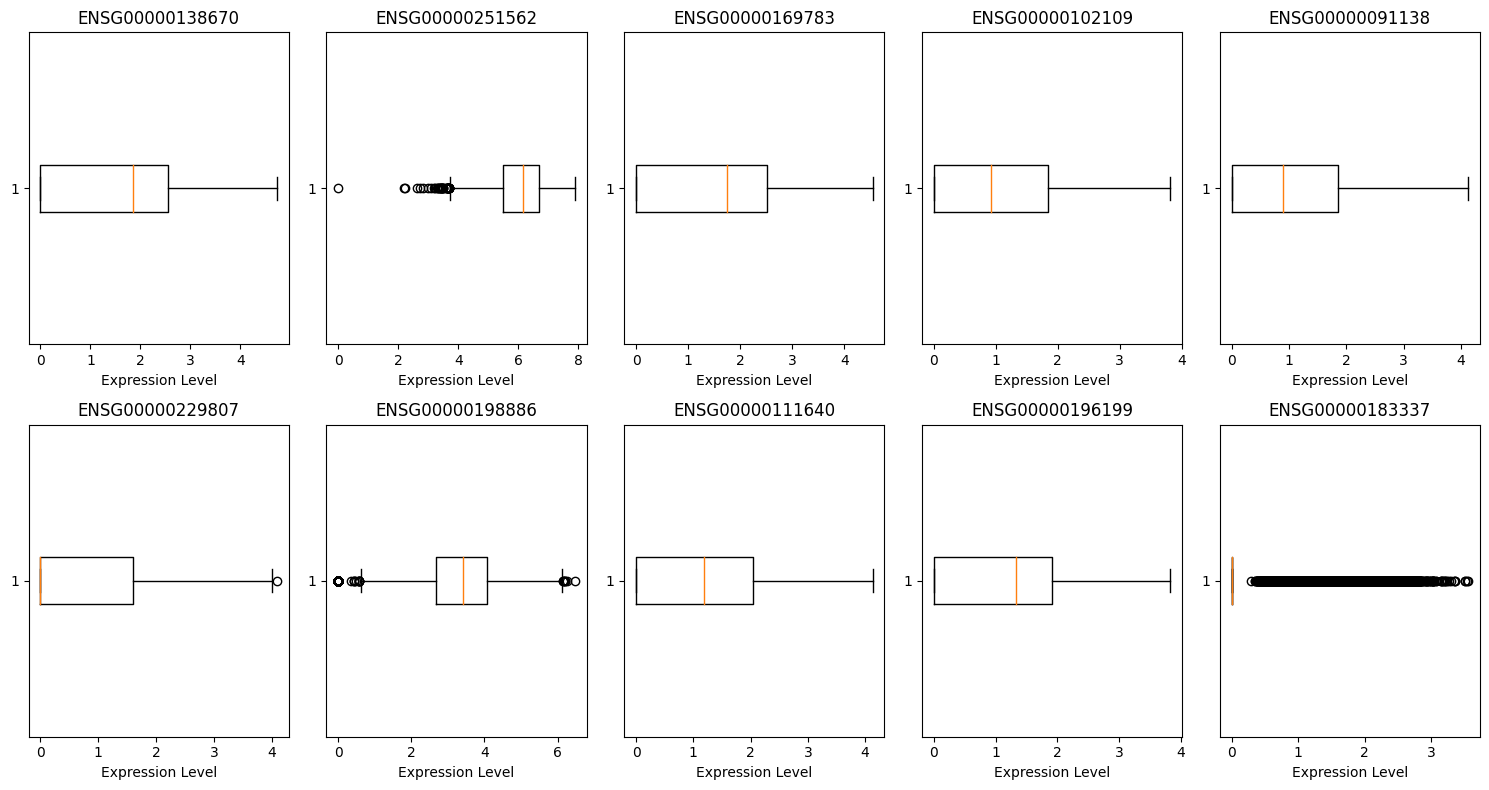

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'top_genes' is a list of your top genes
top_genes = [
    'ENSG00000138670',
    'ENSG00000251562',
    'ENSG00000169783',
    'ENSG00000102109',
    'ENSG00000091138',
    'ENSG00000229807',
    'ENSG00000198886',
    'ENSG00000111640',
    'ENSG00000196199',
    'ENSG00000183337'
]

# Filter adata for top genes
filtered_top_genes_adata = adata[:, top_genes]

# Create a DataFrame for the filtered data
top_genes_df = filtered_top_genes_adata.to_df()

# Identify outliers using the IQR method
def identify_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers[column] = outlier_indices
    return outliers

# Get outliers for the top genes
outliers = identify_outliers_iqr(top_genes_df)

# Print outlier information
for gene, indices in outliers.items():
    print(f"Outliers for {gene}: {indices.tolist()}")

# Optional: Visualizing the expression data for outliers
plt.figure(figsize=(15, 8))
for i, gene in enumerate(top_genes):
    plt.subplot(2, 5, i+1)  # Create a subplot for each gene
    plt.boxplot(top_genes_df[gene], vert=False)
    plt.title(gene)
    plt.xlabel('Expression Level')

plt.tight_layout()
plt.show()


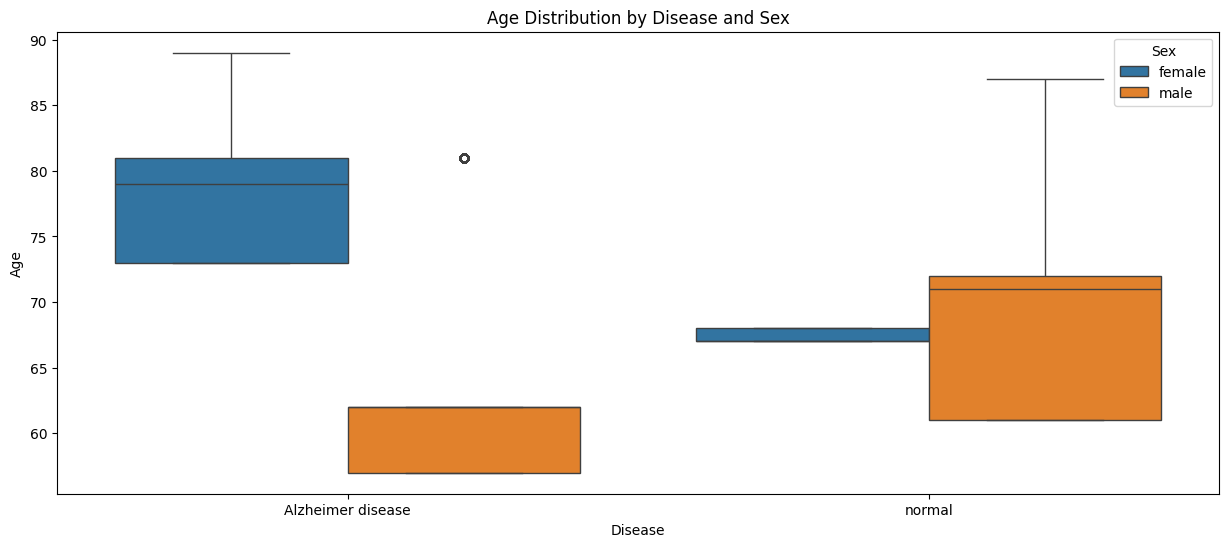

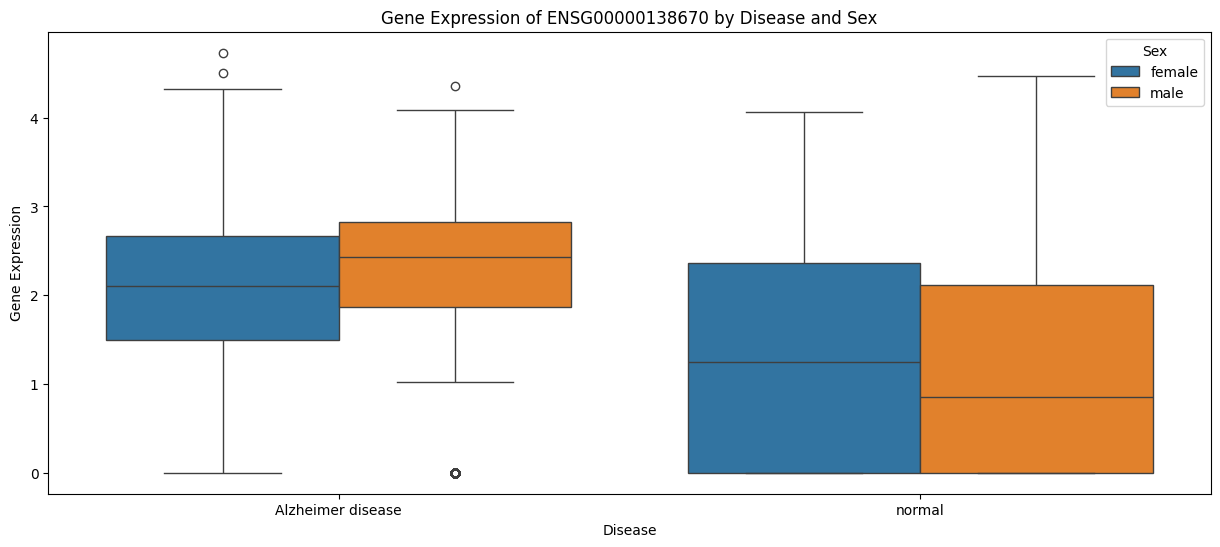

<ipython-input-28-afa576926aa6>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = top_genes_data.groupby(['disease', 'sex'])[gene].corr(top_genes_data['Age']).reset_index()
<ipython-input-28-afa576926aa6>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = top_genes_data.groupby(['disease', 'sex'])[gene].corr(top_genes_data['Age']).reset_index()
<ipython-input-28-afa576926aa6>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

Correlation for ENSG00000138670:
              disease     sex  ENSG00000138670
0  Alzheimer disease  female        -0.465506
1  Alzheimer disease    male         0.148122
2             normal  female        -0.614749
3             normal    male         0.155649
Correlation for ENSG00000251562:
              disease     sex  ENSG00000251562
0  Alzheimer disease  female         0.454702
1  Alzheimer disease    male        -0.027797
2             normal  female        -0.748278
3             normal    male         0.448081
Correlation for ENSG00000169783:
              disease     sex  ENSG00000169783
0  Alzheimer disease  female        -0.451451
1  Alzheimer disease    male         0.356791
2             normal  female        -0.618512
3             normal    male         0.239457
Correlation for ENSG00000102109:
              disease     sex  ENSG00000102109
0  Alzheimer disease  female         0.123989
1  Alzheimer disease    male         0.164801
2             normal  female        

<ipython-input-28-afa576926aa6>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = top_genes_data.groupby(['disease', 'sex'])[gene].corr(top_genes_data['Age']).reset_index()
<ipython-input-28-afa576926aa6>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = top_genes_data.groupby(['disease', 'sex'])[gene].corr(top_genes_data['Age']).reset_index()
<ipython-input-28-afa576926aa6>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

Correlation for ENSG00000111640:
              disease     sex  ENSG00000111640
0  Alzheimer disease  female         0.092966
1  Alzheimer disease    male         0.122384
2             normal  female        -0.492739
3             normal    male        -0.406978
Correlation for ENSG00000196199:
              disease     sex  ENSG00000196199
0  Alzheimer disease  female        -0.002399
1  Alzheimer disease    male        -0.029283
2             normal  female        -0.242064
3             normal    male         0.103458
Correlation for ENSG00000183337:
              disease     sex  ENSG00000183337
0  Alzheimer disease  female        -0.219139
1  Alzheimer disease    male         0.199277
2             normal  female        -0.092158
3             normal    male         0.037330
Disease: Alzheimer disease, Gene: ENSG00000138670, F-statistic: nan, p-value: nan
Disease: normal, Gene: ENSG00000138670, F-statistic: 169.16395872789704, p-value: 2.1055816907824986e-38
Disease: Alzheimer di

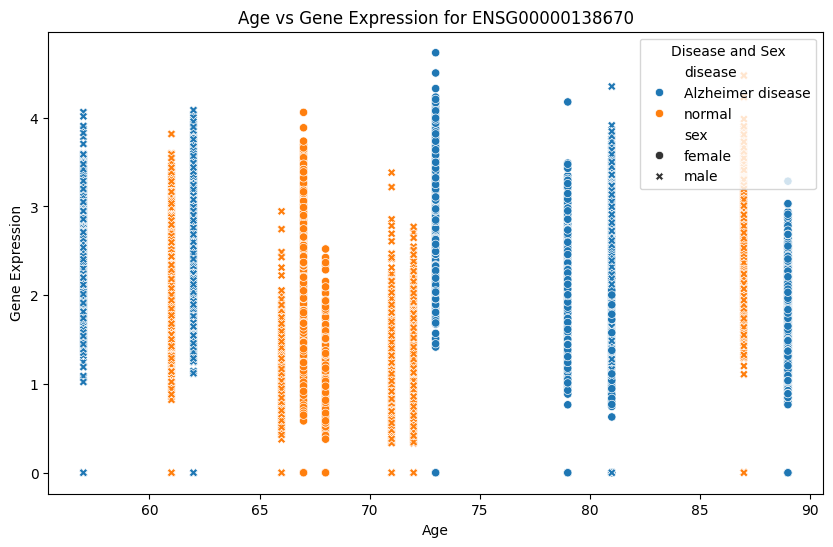

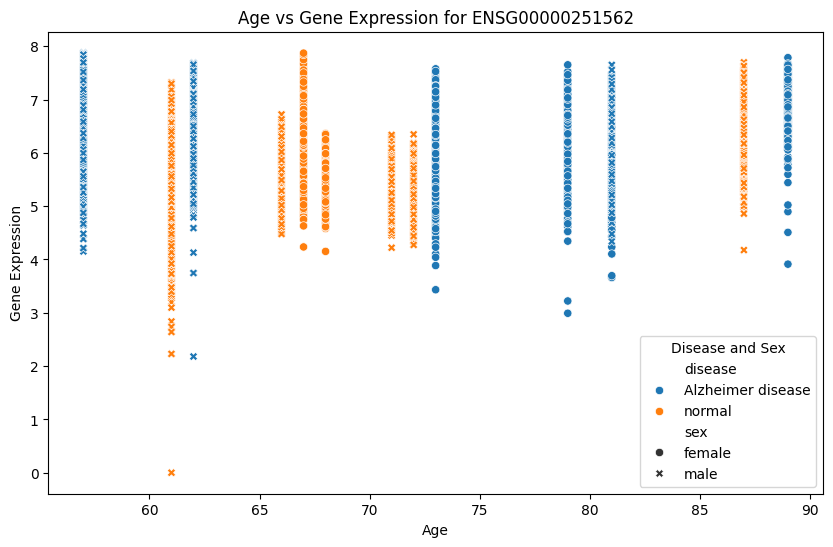

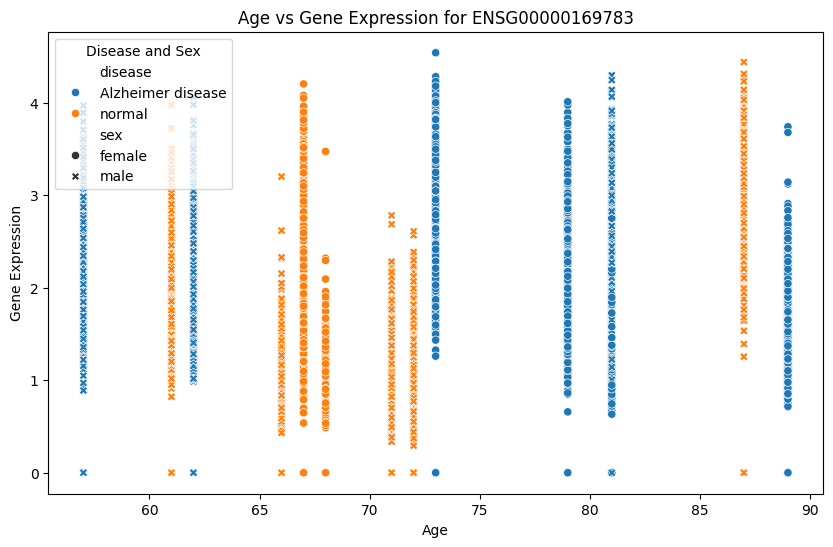

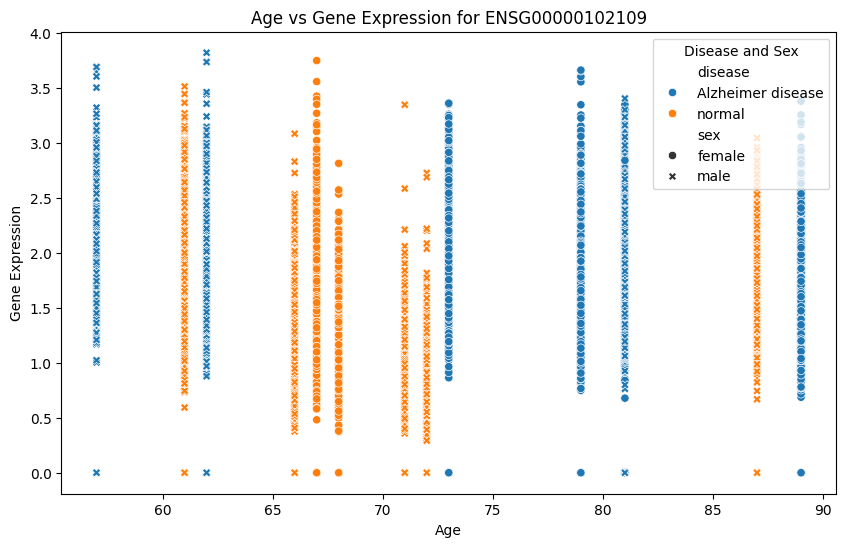

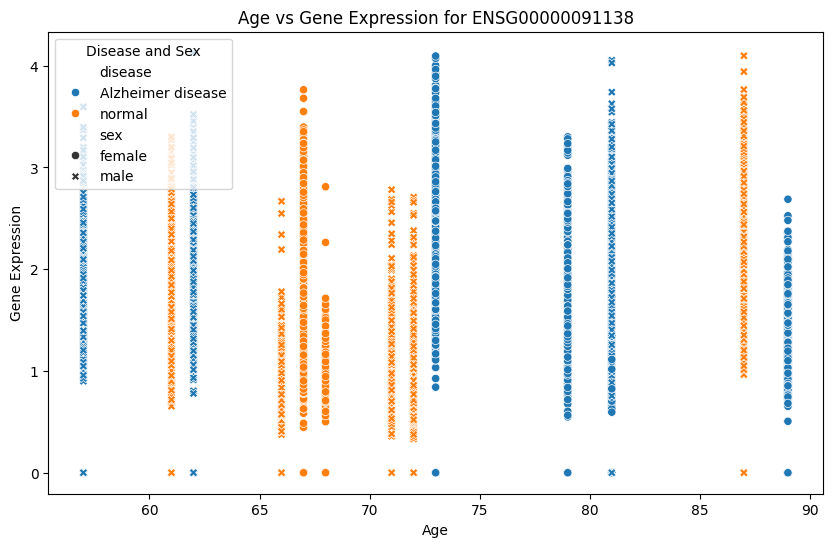

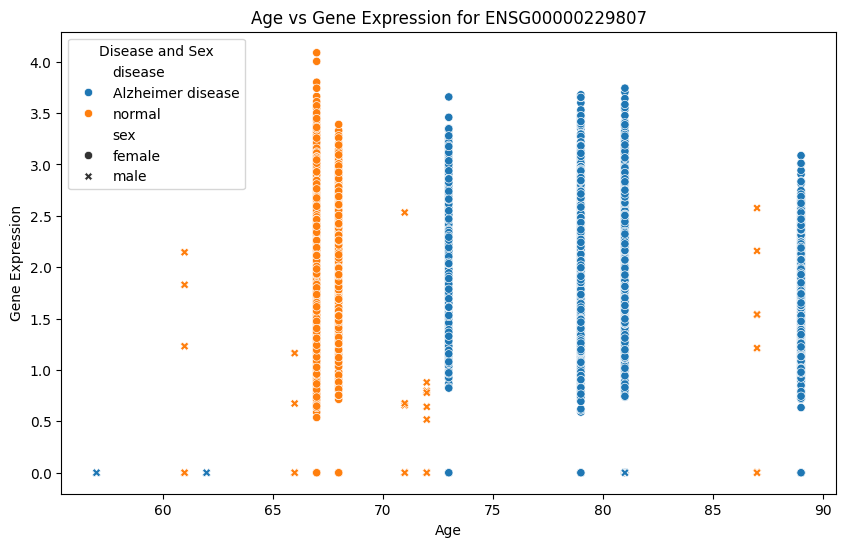

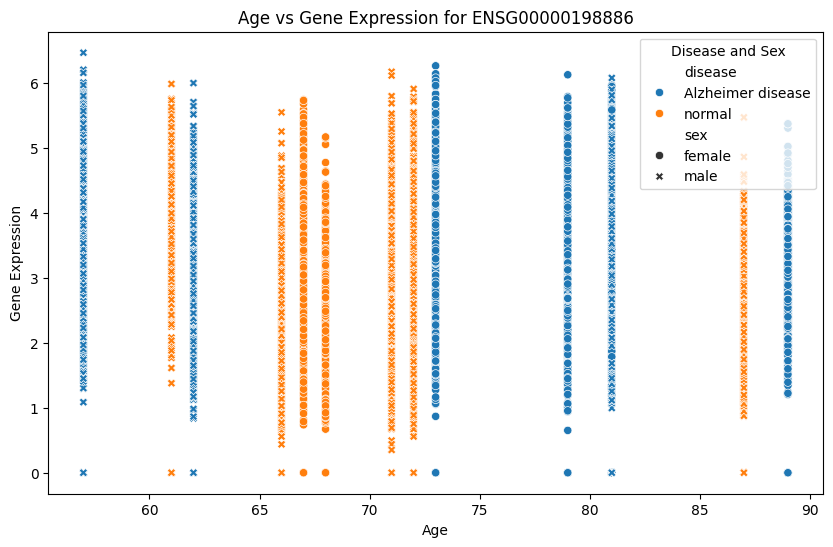

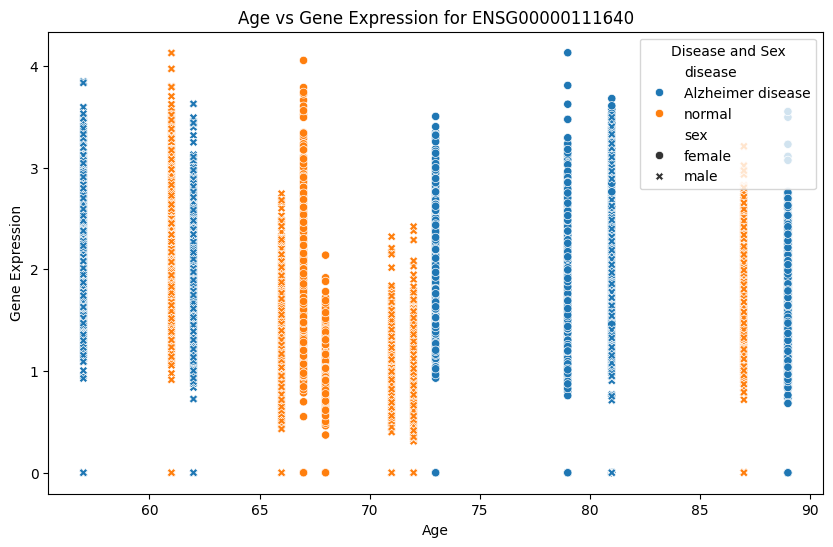

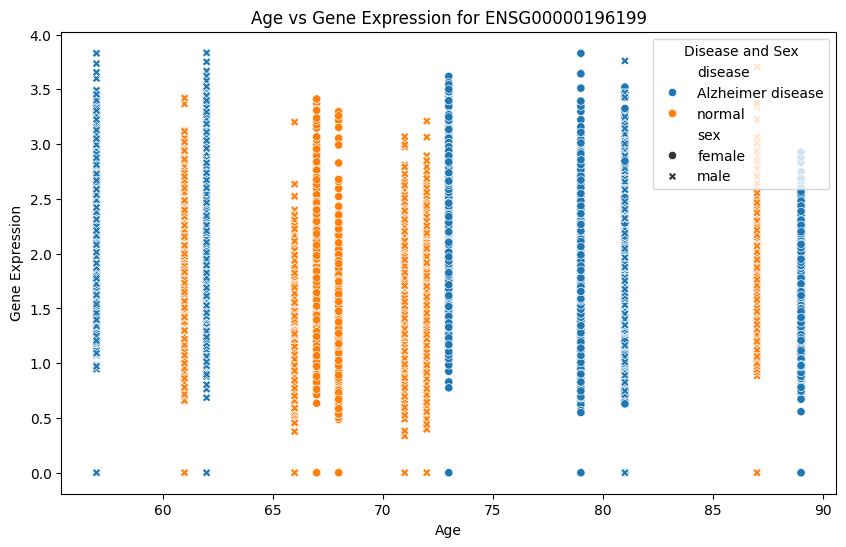

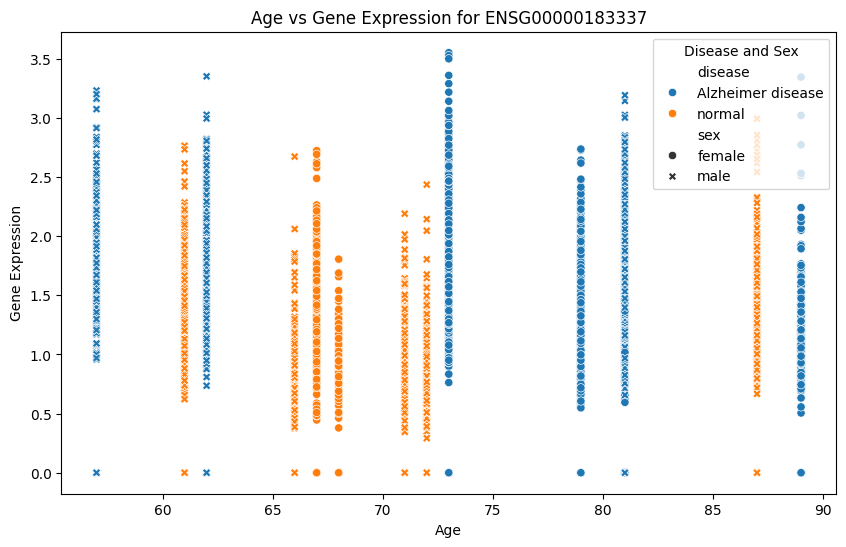

In [ ]:
top_genes = ['ENSG00000138670', 'ENSG00000251562', 'ENSG00000169783',
             'ENSG00000102109', 'ENSG00000091138', 'ENSG00000229807',
             'ENSG00000198886', 'ENSG00000111640', 'ENSG00000196199',
             'ENSG00000183337']

# Create a new DataFrame with relevant columns
top_genes_data = adata.obs[['Age', 'sex', 'disease']].copy()
top_genes_data = top_genes_data.join(adata[:, top_genes].to_df())

# print(top_genes_data.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Age
plt.figure(figsize=(15, 6))
sns.boxplot(x='disease', y='Age', hue='sex', data=top_genes_data)
plt.title('Age Distribution by Disease and Sex')
plt.xlabel('Disease')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.show()

# Plot for Gene Expression (for one of the top genes)
plt.figure(figsize=(15, 6))
sns.boxplot(x='disease', y='ENSG00000138670', hue='sex', data=top_genes_data)
plt.title('Gene Expression of ENSG00000138670 by Disease and Sex')
plt.xlabel('Disease')
plt.ylabel('Gene Expression')
plt.legend(title='Sex')
plt.show()


for gene in top_genes:
    correlation = top_genes_data.groupby(['disease', 'sex'])[gene].corr(top_genes_data['Age']).reset_index()
    print(f"Correlation for {gene}:\n", correlation)


from scipy.stats import f_oneway

for gene in top_genes:
    for disease in top_genes_data['disease'].unique():
        male_ages = top_genes_data[(top_genes_data['disease'] == disease) & (top_genes_data['sex'] == 'male')]['Age']
        female_ages = top_genes_data[(top_genes_data['disease'] == disease) & (top_genes_data['sex'] == 'female')]['Age']
        f_stat, p_val = f_oneway(male_ages, female_ages)
        print(f"Disease: {disease}, Gene: {gene}, F-statistic: {f_stat}, p-value: {p_val}")


for gene in top_genes:
    q1 = top_genes_data[gene].quantile(0.25)
    q3 = top_genes_data[gene].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = top_genes_data[(top_genes_data[gene] < lower_bound) | (top_genes_data[gene] > upper_bound)]
    print(f"Outliers for {gene}:\n", outliers)


for gene in top_genes:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=top_genes_data, x='Age', y=gene, hue='disease', style='sex')
    plt.title(f'Age vs Gene Expression for {gene}')
    plt.xlabel('Age')
    plt.ylabel('Gene Expression')
    plt.legend(title='Disease and Sex')
    plt.show()
